In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools.Calculations import Calculations

In [2]:
FILE_PATH = './raw_data/healthy/000009ISO2XXX-1621502531-2021-05-20-09-22-41-AAAQYC'
data = np.fromfile(FILE_PATH, dtype='uint16').reshape(-1,2)
healthy_calc = Calculations(data)

FILE_PATH = './raw_data/faulty/000009ISO2XXX-1623678270-2021-06-14-13-52-59-AAARCG'
data = np.fromfile(FILE_PATH, dtype='uint16').reshape(-1,2)
faulty_calc = Calculations(data)

Text(671.625, 0.5, 'Total Harmonic Distortion')

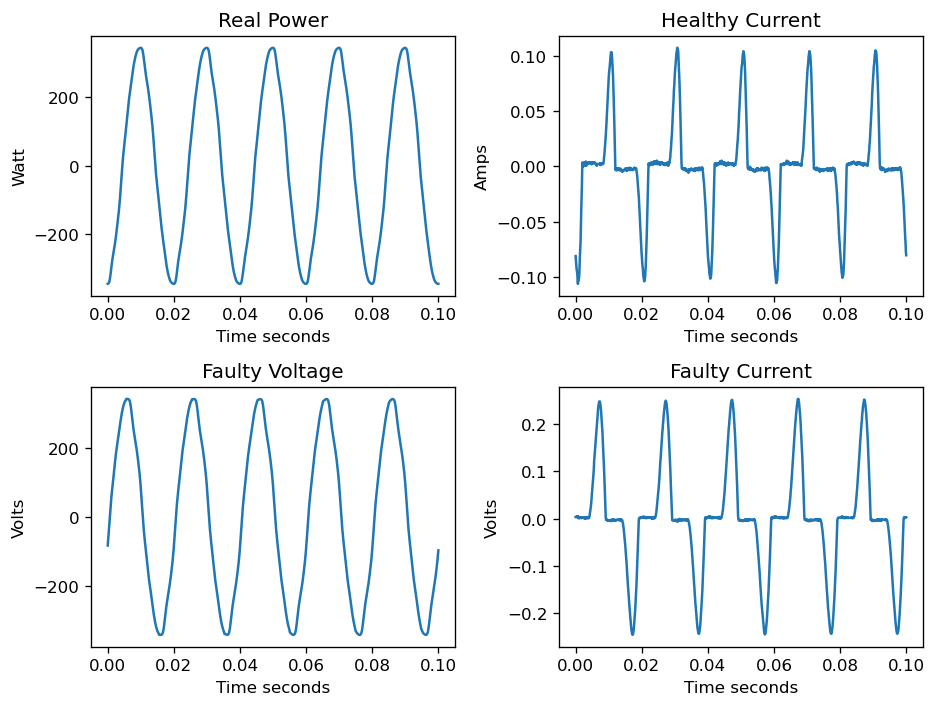

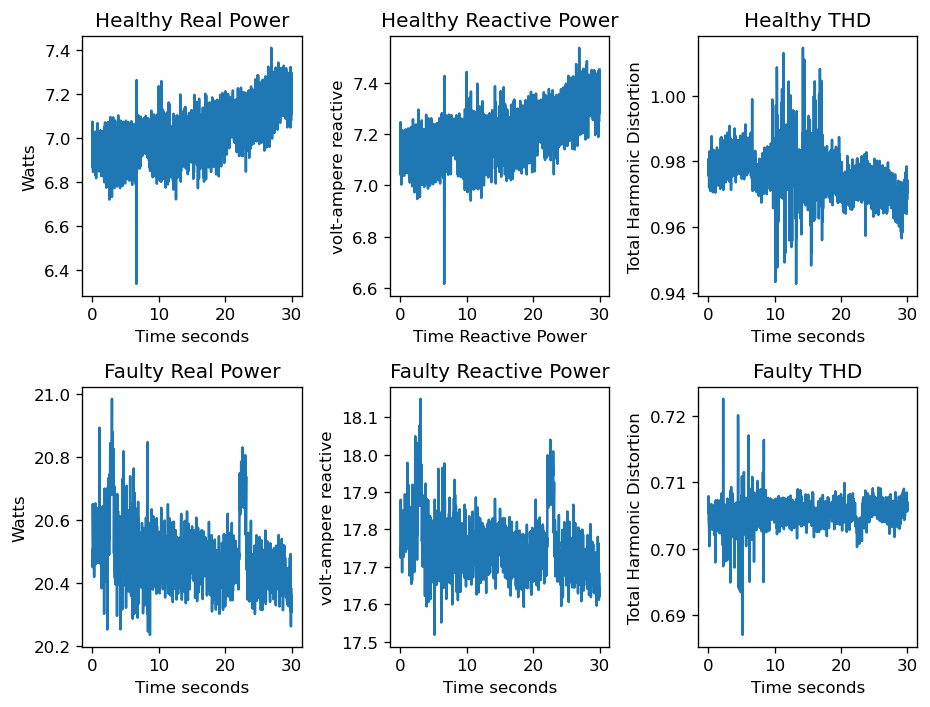

In [3]:
plt.figure(figsize=(8, 6), dpi=120)
time = np.linspace(0,0.1,1000)

# Current, Voltage
plt.subplot(2, 2, 1)
plt.tight_layout()
plt.plot(time, healthy_calc.voltage[:1000])
plt.title("Real Power")
plt.xlabel('Time seconds')
plt.ylabel('Watt')

plt.subplot(2, 2, 2)
plt.tight_layout()
plt.plot(time, healthy_calc.current[:1000])
plt.title("Healthy Current")
plt.xlabel('Time seconds')
plt.ylabel('Amps')

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.plot(time, faulty_calc.voltage[:1000])
plt.title("Faulty Voltage")
plt.xlabel('Time seconds')
plt.ylabel('Volts')

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.plot(time, faulty_calc.current[:1000])
plt.title("Faulty Current")
plt.xlabel('Time seconds')
plt.ylabel('Volts')



# Power
plt.figure(figsize=(8, 6), dpi=120)
time = np.linspace(0,30,1500)

plt.subplot(2, 3, 1)
plt.tight_layout()
plt.plot(time, healthy_calc.real_power)
plt.title("Healthy Real Power")
plt.xlabel('Time seconds')
plt.ylabel('Watts')

plt.subplot(2, 3, 2)
plt.tight_layout()
plt.plot(time, healthy_calc.reactive_power)
plt.title("Healthy Reactive Power")
plt.xlabel('Time Reactive Power')
plt.ylabel('volt-ampere reactive')

plt.subplot(2, 3, 3)
plt.tight_layout()
plt.plot(time, healthy_calc.thd)
plt.title("Healthy THD")
plt.xlabel('Time seconds')
plt.ylabel('Total Harmonic Distortion')

plt.subplot(2, 3, 4)
plt.tight_layout()
plt.plot(time, faulty_calc.real_power)
plt.title("Faulty Real Power")
plt.xlabel('Time seconds')
plt.ylabel('Watts')

plt.subplot(2, 3, 5)
plt.tight_layout()
plt.plot(time, faulty_calc.reactive_power)
plt.title("Faulty Reactive Power")
plt.xlabel('Time seconds')
plt.ylabel('volt-ampere reactive')

plt.subplot(2, 3, 6)
plt.tight_layout()
plt.plot(time, faulty_calc.thd)
plt.title("Faulty THD")
plt.xlabel('Time seconds')
plt.ylabel('Total Harmonic Distortion')